# DATA CLEANING: CRIME RATES IN NYC

## Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

df = pd.read_csv('data/nyc_crime.csv')

### Clean data
- Select the columns needed for the analysis
- Rename the columns
- Fill in the NaN values on columns that is needed for plotting variables
- Convert all the date columns to datetime format. (I am still thinking of combining the date and time but I need to check what I can do to plot it.)
- Check for duplicates. check for columns .nunique() for columns for unique values
- Separate the date and add another columns for years, months and dates

###  Select only necessary column
Columns that are needed are:'CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'LAW_CAT_CD', 'OFNS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon'

In [2]:
df = df[['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460745 entries, 0 to 460744
Data columns (total 19 columns):
CMPLNT_NUM           460745 non-null int64
ADDR_PCT_CD          460745 non-null int64
BORO_NM              460430 non-null object
CMPLNT_FR_DT         460745 non-null object
CMPLNT_FR_TM         460745 non-null object
LAW_CAT_CD           460745 non-null object
LOC_OF_OCCUR_DESC    377888 non-null object
OFNS_DESC            460733 non-null object
SUSP_AGE_GROUP       351565 non-null object
SUSP_RACE            351550 non-null object
SUSP_SEX             351550 non-null object
VIC_AGE_GROUP        460745 non-null object
VIC_RACE             460742 non-null object
VIC_SEX              460742 non-null object
X_COORD_CD           460745 non-null int64
Y_COORD_CD           460745 non-null int64
Latitude             460745 non-null float64
Longitude            460745 non-null float64
Lat_Lon              460745 non-null object
dtypes: float64(2), int64(4), object(13)
memory usage: 

### Rename columns and fill in NaN values.

In [3]:
# Rename columns.
df = df.rename(columns={"BORO_NM": "BOROUGH", "CMPLNT_FR_DT": "DATE", "CMPLNT_FR_TM": "TIME", "LAW_CAT_CD": "OFFENSE LEVEL", "ADDR_PCT_CD": "DISTRICT", "OFNS_DESC": "OFFENSE_NAME"})

# Fill in NaN values on BORO_NM
df["BOROUGH"].fillna("UNKNOWN", inplace = True) 
df["LOC_OF_OCCUR_DESC"].fillna("UNKNOWN", inplace = True) 
df["SUSP_AGE_GROUP"].fillna("UNKNOWN", inplace = True) 
df["VIC_RACE"].fillna("UNKNOWN", inplace = True) 
df["VIC_RACE"].fillna("UNKNOWN", inplace = True) 
df["SUSP_RACE"].fillna("UNKNOWN", inplace = True) 
df["SUSP_SEX"].fillna("UNKNOWN", inplace = True) 

df.head()

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,OFFENSE LEVEL,LOC_OF_OCCUR_DESC,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,12/31/19,18:00:00,FELONY,UNKNOWN,ROBBERY,UNKNOWN,UNKNOWN,U,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,12/30/19,20:30:00,MISDEMEANOR,INSIDE,PETIT LARCENY,UNKNOWN,UNKNOWN,UNKNOWN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,12/24/19,16:55:00,FELONY,UNKNOWN,FELONY ASSAULT,UNKNOWN,BLACK,M,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,12/30/19,19:32:00,MISDEMEANOR,INSIDE,PETIT LARCENY,25-44,WHITE,F,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,12/30/19,15:30:00,MISDEMEANOR,UNKNOWN,PETIT LARCENY,UNKNOWN,UNKNOWN,UNKNOWN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"


### Change dates to datetime format.

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME'] = pd.to_datetime(df['TIME'])

### Add columns for day, month, year and sort by date.

In [5]:
# Add Columns for Hour, Day, Weekday, Month, Year
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

#Sort By Date in descending order
df = df.sort_values('DATE')
df.head()

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,OFFENSE LEVEL,LOC_OF_OCCUR_DESC,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
125688,863566396,100,QUEENS,2015-01-01,2020-05-20 00:00:00,FELONY,INSIDE,MISCELLANEOUS PENAL LAW,25-44,WHITE,...,WHITE,M,1035212,152992,40.586466,-73.816522,"(40.58646552900007, -73.81652172299994)",2015,1,1
436147,780908649,42,BRONX,2015-01-01,2020-05-20 00:00:00,FELONY,INSIDE,SEX CRIMES,25-44,BLACK HISPANIC,...,BLACK HISPANIC,F,1008798,238971,40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",2015,1,1
312163,996127336,50,BRONX,2015-01-01,2020-05-20 00:00:00,MISDEMEANOR,INSIDE,SEX CRIMES,UNKNOWN,UNKNOWN,...,WHITE HISPANIC,F,1011257,261130,40.883383,-73.902333,"(40.883382579000056, -73.90233330899997)",2015,1,1
311798,160752445,18,MANHATTAN,2015-01-01,2020-05-20 00:00:00,VIOLATION,INSIDE,HARRASSMENT 2,UNKNOWN,UNKNOWN,...,WHITE,F,987959,217674,40.764149,-73.986612,"(40.76414872600003, -73.98661223299997)",2015,1,1
360886,990576089,66,BROOKLYN,2015-01-01,2020-05-20 00:01:00,FELONY,INSIDE,GRAND LARCENY,45-64,WHITE,...,WHITE,F,985162,169652,40.632340,-73.996716,"(40.63234026100001, -73.99671569099996)",2015,1,1


### Check that each value for `COMPLAINT_NUM` is unique.

In [6]:
# Check that each COMPLAINT NUM is unique
CN_unique = df['CMPLNT_NUM'].nunique()
CN_unique == len(df)

True

### Plotting total crimes each year in NYC
I will plot the total crimes each year in NYC to peek at the data and see if there are any abnormalities

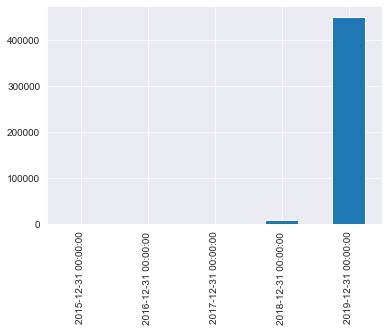

In [7]:
# Plot Crime Frequency by Date 

# Create a subset dataframe by combining columns
date_boro_df = df[['DATE', 'BOROUGH']]

# Count the sum of occurences for each date
dates = date_boro_df.DATE.value_counts()

# # Use resample to organize it into Yearly sums
count = dates.resample(rule='Y').apply('sum')
count

# #Plot 
count.plot(kind='bar')

There are fewer recorded crimes from 2015 to 2018 because NYC OpenData and NYPD Database did not merge until 2017. Because of this, there are way fewer data in those years that it will make our graphs different since it will consider years 2015 to 2018 as outliers of 2019.

## For better data, we will now focus only on crime records in 2019.

### Filter only 2019 dates from `df`

In [8]:
df = df[df['DATE'].dt.year == 2019]
df.head()

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,OFFENSE LEVEL,LOC_OF_OCCUR_DESC,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
460182,900735981,105,QUEENS,2019-01-01,2020-05-20 15:00:00,VIOLATION,FRONT OF,HARRASSMENT 2,UNKNOWN,UNKNOWN,...,ASIAN / PACIFIC ISLANDER,F,1056264,205572,40.730639,-73.740167,"(40.730639403000055, -73.74016656399994)",2019,1,1
460184,495588128,44,BRONX,2019-01-01,2020-05-20 18:35:00,FELONY,UNKNOWN,CRIMINAL MISCHIEF & RELATED OF,UNKNOWN,UNKNOWN,...,UNKNOWN,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1
455749,876271073,88,BROOKLYN,2019-01-01,2020-05-20 01:00:00,FELONY,INSIDE,GRAND LARCENY,UNKNOWN,UNKNOWN,...,WHITE,F,990026,189746,40.687492,-73.979174,"(40.687492038000066, -73.97917448199998)",2019,1,1
449662,394629573,44,BRONX,2019-01-01,2020-05-20 15:15:00,FELONY,UNKNOWN,CRIMINAL MISCHIEF & RELATED OF,25-44,WHITE HISPANIC,...,UNKNOWN,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1
460185,579035297,18,MANHATTAN,2019-01-01,2020-05-20 02:10:00,FELONY,INSIDE,FELONY ASSAULT,UNKNOWN,BLACK,...,WHITE HISPANIC,M,987374,217550,40.763809,-73.988724,"(40.763808604000076, -73.98872409799998)",2019,1,1


## Group similar crime types into one category
Here we show every offense name occuring in the data. 

In [9]:
# Get a list of all the different crime types
def get_all_crime_types():
    result = []
    for key in df.OFFENSE_NAME.tolist():
        if key not in result:
            result.append(key)
    return result
get_all_crime_types()

['HARRASSMENT 2',
 'CRIMINAL MISCHIEF & RELATED OF',
 'GRAND LARCENY',
 'FELONY ASSAULT',
 'INTOXICATED & IMPAIRED DRIVING',
 'ASSAULT 3 & RELATED OFFENSES',
 'GRAND LARCENY OF MOTOR VEHICLE',
 'BURGLARY',
 'FORGERY',
 'SEX CRIMES',
 'VEHICLE AND TRAFFIC LAWS',
 'PETIT LARCENY',
 'DANGEROUS WEAPONS',
 'ROBBERY',
 'OFF. AGNST PUB ORD SENSBLTY &',
 'CRIMINAL TRESPASS',
 'UNAUTHORIZED USE OF A VEHICLE',
 'OFFENSES AGAINST PUBLIC ADMINI',
 'MISCELLANEOUS PENAL LAW',
 'DANGEROUS DRUGS',
 'RAPE',
 'THEFT-FRAUD',
 'ADMINISTRATIVE CODE',
 'FRAUDS',
 'OTHER OFFENSES RELATED TO THEF',
 'MURDER & NON-NEGL. MANSLAUGHTER',
 'OFFENSES INVOLVING FRAUD',
 'NYS LAWS-UNCLASSIFIED FELONY',
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
 "BURGLAR'S TOOLS",
 'ARSON',
 'OFFENSES AGAINST THE PERSON',
 'POSSESSION OF STOLEN PROPERTY',
 'DISORDERLY CONDUCT',
 'OTHER STATE LAWS (NON PENAL LA',
 'ALCOHOLIC BEVERAGE CONTROL LAW',
 'OFFENSES RELATED TO CHILDREN',
 'PETIT LARCENY OF MOTOR VEHICLE',
 'JOSTLING',
 'THEFT O

Many offenses are similar but have different names, such as "GRAND LARCENY OF MOTOR VEHICLE" and "GRAND LARCENY" so we will combine all similar offense names into one name.  

In [10]:
df.OFFENSE_NAME.fillna("UNKNOWN", inplace=True)
df[df['OFFENSE_NAME'].str.contains("LARCENY")]

,CMPLNT_NUM,DISTRICT,BOROUGH,DATE,TIME,OFFENSE LEVEL,LOC_OF_OCCUR_DESC,OFFENSE_NAME,SUSP_AGE_GROUP,SUSP_RACE,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY
455749,876271073,88,BROOKLYN,2019-01-01,2020-05-20 01:00:00,FELONY,INSIDE,GRAND LARCENY,UNKNOWN,UNKNOWN,...,WHITE,F,990026,189746,40.687492,-73.979174,"(40.687492038000066, -73.97917448199998)",2019,1,1
455269,938464105,46,BRONX,2019-01-01,2020-05-20 02:34:00,FELONY,FRONT OF,GRAND LARCENY OF MOTOR VEHICLE,25-44,BLACK,...,BLACK,M,1008082,247358,40.845592,-73.913864,"(40.845591766000034, -73.91386434799993)",2019,1,1
455129,828731109,5,MANHATTAN,2019-01-01,2020-05-20 00:30:00,MISDEMEANOR,FRONT OF,PETIT LARCENY,18-24,UNKNOWN,...,WHITE,F,984182,201589,40.720000,-74.000247,"(40.72000018000005, -74.00024675899994)",2019,1,1
455135,270936341,48,BRONX,2019-01-01,2020-05-20 01:30:00,MISDEMEANOR,FRONT OF,PETIT LARCENY,45-64,WHITE HISPANIC,...,WHITE HISPANIC,F,1016395,249191,40.850596,-73.883810,"(40.85059645800004, -73.88380952799997)",2019,1,1
456324,558795797,50,BRONX,2019-01-01,2020-05-20 12:30:00,MISDEMEANOR,FRONT OF,PETIT LARCENY,UNKNOWN,UNKNOWN,...,WHITE HISPANIC,F,1010183,258710,40.876744,-73.906227,"(40.87674365400005, -73.90622668999998)",2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,434609019,75,BROOKLYN,2019-12-31,2020-05-20 18:00:00,MISDEMEANOR,INSIDE,PETIT LARCENY,UNKNOWN,UNKNOWN,...,UNKNOWN,D,1020754,176733,40.651701,-73.868447,"(40.65170090400005, -73.86844675099996)",2019,12,31
6968,855389882,45,BRONX,2019-12-31,2020-05-20 07:38:00,FELONY,FRONT OF,GRAND LARCENY OF MOTOR VEHICLE,UNKNOWN,UNKNOWN,...,BLACK HISPANIC,M,1033243,240746,40.827340,-73.822972,"(40.82734002000007, -73.82297225399996)",2019,12,31
10925,692673454,62,BROOKLYN,2019-12-31,2020-05-20 16:50:00,MISDEMEANOR,INSIDE,PETIT LARCENY,25-44,WHITE HISPANIC,...,UNKNOWN,D,989901,159740,40.605132,-73.979650,"(40.60513212200004, -73.97965033599996)",2019,12,31
6890,483972542,84,BROOKLYN,2019-12-31,2020-05-20 05:10:00,MISDEMEANOR,UNKNOWN,PETIT LARCENY,UNKNOWN,UNKNOWN,...,BLACK,M,989130,192790,40.695848,-73.982403,"(40.69584765600007, -73.98240305199994)",2019,12,31


In [11]:
# Create arrays to categorize crimes into 20 categories
crime_types = {
    "SEX CRIMES": "SEX_CRIMES",
    "RAPE": "SEX_CRIMES",
    "FELONY SEX CRIMES": "SEX_CRIMES",
    
    "HARRASSMENT 2": "HARRASSMENT",
    "JOSTLING": "HARRASSMENT",
    "FRAUDULENT ACCOSTING": "HARRASSMENT",
    
    "FELONY ASSAULT": "ASSAULT",
    "ASSAULT 3 & RELATED OFFENSES": "ASSAULT",
    
    "OTHER OFFENSES RELATED TO THEF": "THEFT",
    "THEFT OF SERVICES": "THEFT",
    "POSSESSION OF STOLEN PROPERTY": "THEFT",
    
    "OFF. AGNST PUB ORD SENSBLTY &": "OFFENSES_AGAINST_PUBLIC_ORDER",
    "OFFENSES AGAINST PUBLIC ADMINI": "OFFENSES_AGAINST_PUBLIC_ORDER",
    "OFFENSES AGAINST THE PERSON": "OFFENSES_AGAINST_PUBLIC_ORDER",
    "POSSESSION OF STOLEN PROPERT": "OFFENSES_AGAINST_PUBLIC_ORDER",
    "DISORDERLY CONDUCT": "OFFENSES_AGAINST_PUBLIC_ORDER",
    'OFFENSES RELATED TO CHILDREN': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'FRAUDULENT ACCOSTING': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'ENDAN WELFARE INCOMP': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'DISRUPTION OF A RELIGIOUS SERV': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'OFFENSES AGAINST MARRIAGE UNCL': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'CRIMINAL TRESPASS': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'OFFENSES AGAINST PUBLIC SAFETY': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'DISRUPTION OF A RELIGIOUS SERV': "OFFENSES_AGAINST_PUBLIC_ORDER",
    'CRIMINAL MISCHIEF & RELATED OF': "OFFENSES_AGAINST_PUBLIC_ORDER",
    "ALCOHOLIC BEVERAGE CONTROL LAW": "OFFENSES_AGAINST_PUBLIC_ORDER",
    
    'DANGEROUS DRUGS': "POSSESSION_CONTROLLED_SUBSSTANCE",
    
    "DANGEROUS WEAPONS": "POSSESSION_WEAPON",
    "UNLAWFUL POSS. WEAP. ON SCHOOL": "POSSESSION_WEAPON",
    
    "VEHICLE AND TRAFFIC LAWS": "TRAFFIC_LAWS_VIOLATION",
    "UNAUTHORIZED USE OF A VEHICLE": "POSSESSION_WEAPON",
    "OTHER TRAFFIC INFRACTION": "POSSESSION_WEAPON",
    
    "FORGERY": "FORGERY",
    
    "INTOXICATED & IMPAIRED DRIVING": "DRIVING_UNDER_INFLUENCE",
    "INTOXICATED/IMPAIRED DRIVING": "DRIVING_UNDER_INFLUENCE",
    "DRIVING_UNDER_INFLUENCE": "DRIVING_UNDER_INFLUENCE",
    
    "MURDER & NON-NEGL. MANSLAUGHTER": "MURDER",
    
    "ROBBERY": "ROBBERY",
    
    "KIDNAPPING": "KIDNAPPING",
    "KIDNAPPING & RELATED OFFENSES": "KIDNAPPING",
    "KIDNAPPING AND RELATED OFFENSES": "KIDNAPPING",
    
    "BURGLARY": "BURGLARY",
    "CRIMINAL TRESPASS": "BURGLARY",
    "BURGLAR'S TOOLS": "BURGLARY",
    
    "PETIT LARCENY": "LARCENY",
    "GRAND LARCENY": "LARCENY",
    "GRAND LARCENY OF MOTOR VEHICLE": "LARCENY",
    "PETIT LARCENY OF MOTOR VEHICLE": "LARCENY",
    
    "FRAUDS": "FRAUD",
    "THEFT-FRAUD": "FRAUD",
    "OFFENSES INVOLVING FRAUD": "FRAUD",
    "FRAUDULENT ACCOSTING": "FRAUD",
    
    "NYS LAWS-UNCLASSIFIED FELONY": "UNCLASSIFIED",
    "NYS LAWS-UNCLASSIFIED VIOLATION": "UNCLASSIFIED",
    "ESCAPE 3": "UNCLASSIFIED",
    "OTHER STATE LAWS (NON PENAL LA": "UNCLASSIFIED",
    "UNKNOWN": "UNCLASSIFIED",
    "OTHER STATE LAWS (NON PENAL LAW)": "UNCLASSIFIED",
    "OTHER STATE LAWS": "UNCLASSIFIED",
    "ANTICIPATORY OFFENSES": "UNCLASSIFIED",
    "ADMINISTRATIVE CODE": "UNCLASSIFIED",
    
    "MISCELLANEOUS PENAL LAW": "MISC_PENAL_LAW",
    
    "ARSON": "ARSON",
    
    "GAMBLING": "GAMBLING",
    "LOITERING/GAMBLING (CARDS, DIC": "GAMBLING",
    
    "HOMICIDE-NEGLIGENT-VEHICLE": "HOMICIDE",
    "HOMICIDE-NEGLIGENT,UNCLASSIFIE": "HOMICIDE",
    "HOMICIDE": "HOMICIDE",
    
    "AGRICULTURE & MRKTS LAW-UNCLASSIFIED": "SOCIAL_RELATED_CRIMES",
    "PROSTITUTION & RELATED OFFENSES": "SOCIAL_RELATED_CRIMES",
    "OFFENSES RELATED TO CHILDREN": "SOCIAL_RELATED_CRIMES",
    "DISORDERLY CONDUCT": "SOCIAL_RELATED_CRIMES",
    "AGRICULTURE & MRKTS LAW-UNCLASSIFIED": "SOCIAL_RELATED_CRIMES",
    "CHILD ABANDONMENT/NON SUPPORT": "SOCIAL_RELATED_CRIMES",
}


In [12]:
# Fill NaN values with "UNKNOWN"
df.OFFENSE_NAME.fillna("UNKNOWN", inplace=True)

# Create a new column CRIME_TYPE to contain the offense type gropu
# From https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict
df['CRIME_TYPE'] = df['OFFENSE_NAME'].map(crime_types).fillna(df['OFFENSE_NAME'])

We can see that many offense names containig "ASSAULT" have been grouped together into one offense name called "ASSAULT", and the same has been done for the other similar named offense names. Now that we have combined similar offense names, let's see which crimes were the most frequent.

In [13]:
print(len(df.CRIME_TYPE.value_counts()))
df.CRIME_TYPE.value_counts()


22


LARCENY                             134122
OFFENSES_AGAINST_PUBLIC_ORDER        74031
ASSAULT                              73102
HARRASSMENT                          71000
MISC_PENAL_LAW                       14048
BURGLARY                             13973
POSSESSION_CONTROLLED_SUBSSTANCE     13367
ROBBERY                              13325
POSSESSION_WEAPON                     7791
SEX_CRIMES                            7535
TRAFFIC_LAWS_VIOLATION                6740
FRAUD                                 6193
FORGERY                               4683
DRIVING_UNDER_INFLUENCE               4366
THEFT                                 3053
UNCLASSIFIED                          1969
ARSON                                  675
MURDER                                 292
GAMBLING                               289
SOCIAL_RELATED_CRIMES                  287
KIDNAPPING                             126
HOMICIDE                                11
Name: CRIME_TYPE, dtype: int64

In [14]:
df['CRIME_TYPE'].value_counts(normalize=True) * 100

LARCENY                             29.740253
OFFENSES_AGAINST_PUBLIC_ORDER       16.415657
ASSAULT                             16.209660
HARRASSMENT                         15.743562
MISC_PENAL_LAW                       3.115008
BURGLARY                             3.098377
POSSESSION_CONTROLLED_SUBSSTANCE     2.964003
ROBBERY                              2.954690
POSSESSION_WEAPON                    1.727579
SEX_CRIMES                           1.670813
TRAFFIC_LAWS_VIOLATION               1.494530
FRAUD                                1.373238
FORGERY                              1.038410
DRIVING_UNDER_INFLUENCE              0.968118
THEFT                                0.676973
UNCLASSIFIED                         0.436607
ARSON                                0.149675
MURDER                               0.064748
GAMBLING                             0.064083
SOCIAL_RELATED_CRIMES                0.063639
KIDNAPPING                           0.027939
HOMICIDE                          

In [15]:
df.to_csv('./data/final_NYC_crimes.csv', index=False)